# Exploratory Data Analysis

In [1]:
%matplotlib inline

# ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pylab import rcParams

# set font scale and style
plt.rcParams.update({'font.size': 18})

# stat models
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf

## Read  data

In [2]:
df = pd.read_csv('../data/daily_ts_data.csv') 
df['date_created'] = pd.to_datetime(df['date_created'])
df.index = df.date_created
df.drop(['date_created'], axis=1, inplace=True)
print("Data size:", df.shape)
df.tail(10)

Data size: (7224, 7)


,categories,year,month,weekday,season,weekend,count
date_created,,,,,,,
2014-12-28,gr-qc,2014,12,0,winter,True,3
2014-12-28,hep-th,2014,12,0,winter,True,1
2014-12-29,astro-ph,2014,12,1,winter,False,7
2014-12-29,cond-mat,2014,12,1,winter,False,14
2014-12-29,gr-qc,2014,12,1,winter,False,1
2014-12-29,hep-th,2014,12,1,winter,False,6
2014-12-30,astro-ph,2014,12,2,winter,False,8
2014-12-30,cond-mat,2014,12,2,winter,False,5
2014-12-30,gr-qc,2014,12,2,winter,False,2


In [3]:
df.categories.value_counts()

cond-mat    1823
astro-ph    1818
hep-th      1800
gr-qc       1783
Name: categories, dtype: int64

In [4]:
df.year.value_counts()

2013    1454
2012    1451
2010    1450
2011    1446
2014    1423
Name: year, dtype: int64

In [5]:
df.season.value_counts()

spring    1831
summer    1825
fall      1787
winter    1781
Name: season, dtype: int64

In [6]:
df.weekday.value_counts()

1    1044
2    1044
5    1041
4    1040
3    1039
0    1025
6     991
Name: weekday, dtype: int64

In [7]:
df.weekend.value_counts()

False    5208
True     2016
Name: weekend, dtype: int64

## Plots

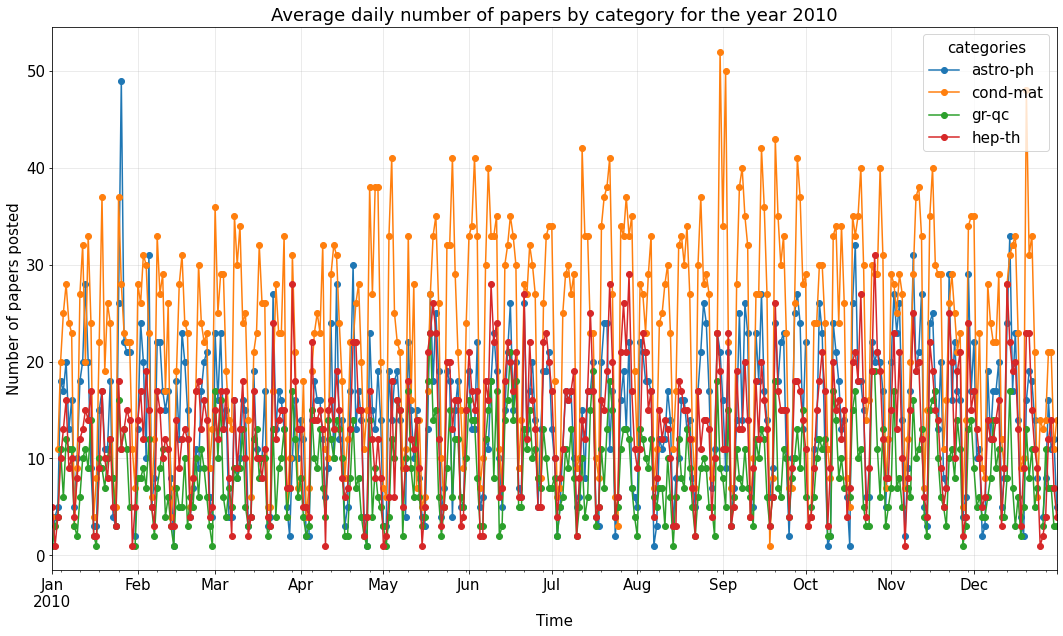

<Figure size 1296x576 with 0 Axes>

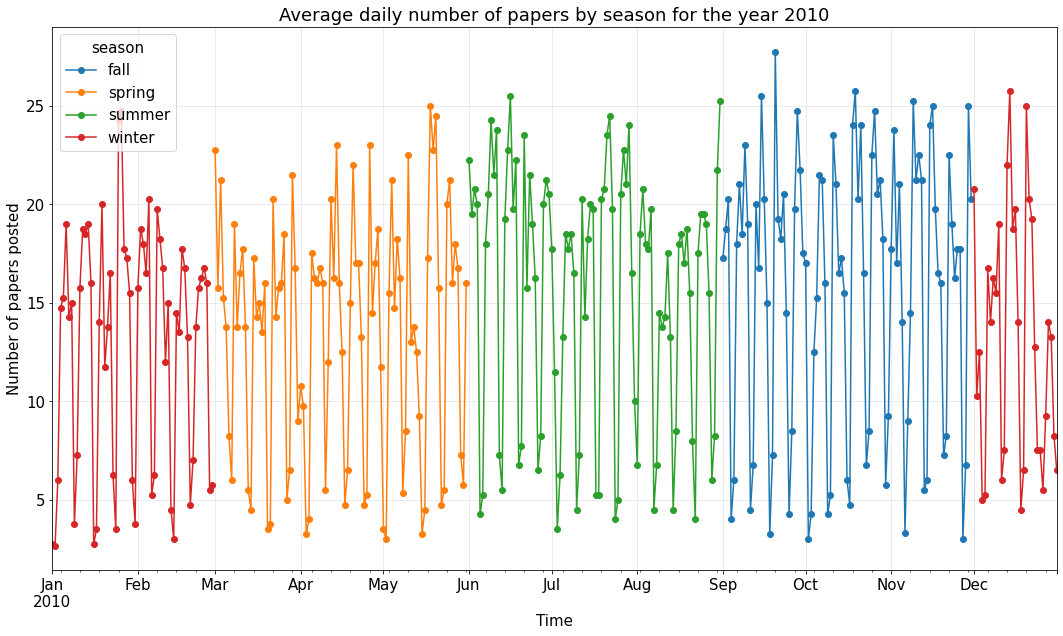

<Figure size 1296x576 with 0 Axes>

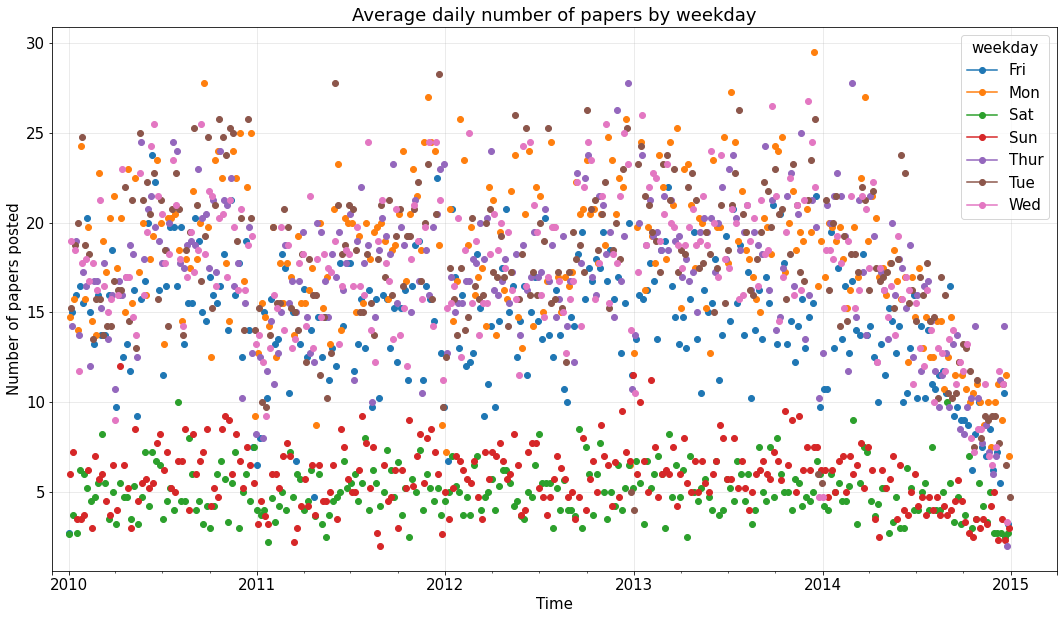

In [34]:
wday_dict = {1:'Mon', 2:'Tue', 3:'Wed', 4:'Thur', 
             5:'Fri',  6:'Sat',   0:'Sun'}
df['weekday'].replace(wday_dict, inplace = True)

pivot_tab1 = df.pivot_table('count', index='date_created', columns='categories', aggfunc='mean')
pivot_tab2 = df.pivot_table('count', index='date_created', columns='season', aggfunc='mean')
pivot_tab3 = df.pivot_table('count', index='date_created', columns='weekday', aggfunc='mean')

pivot_tab1['2010-01-01':'2010-12-31'].plot(marker = 'o', figsize = (18,10))
plt.xlabel('Time')
plt.ylabel('Number of papers posted')
plt.title('Average daily number of papers by category for the year 2010')
plt.grid(True, alpha=0.3)
# plt.xlim(['2009-12-30', '2015-01-01'])
plt.savefig('../images/fig1a.png')

plt.figure()
pivot_tab2['2010-01-01':'2010-12-31'].plot(marker = 'o', figsize = (18,10))
plt.xlabel('Time')
plt.ylabel('Number of papers posted')
plt.title('Average daily number of papers by season for the year 2010')
# plt.xlim(['2015-12-30', '2017-01-01'])
plt.grid(True, alpha=0.3)
plt.savefig('../images/fig1b.png')

plt.figure()
pivot_tab3.plot(marker='o', figsize = (18,10))
plt.xlabel('Time')
plt.ylabel('Number of papers posted')
plt.title('Average daily number of papers by weekday')
plt.grid(True, alpha=0.3)
plt.xlim(['2009-11-30', '2015-03-31'])
plt.savefig('../images/fig1c.png')
plt.show()

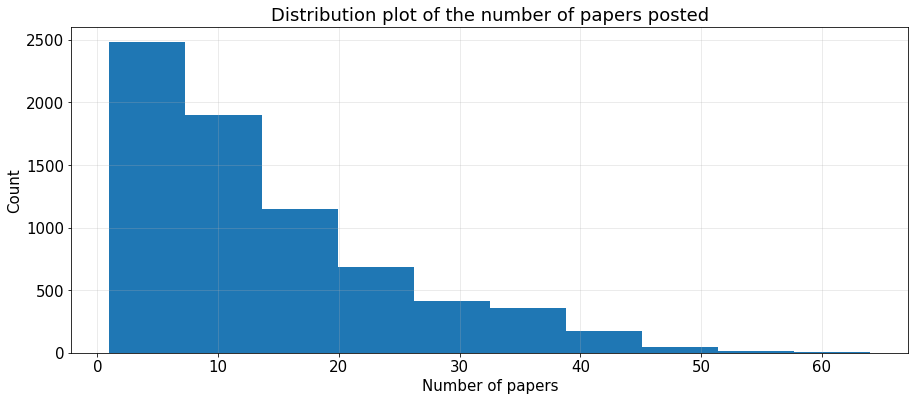

In [22]:
y = df['count']
y.hist(figsize=(15,6))
plt.xlabel('Number of papers')
plt.ylabel('Count')
plt.title('Distribution plot of the number of papers posted')
plt.grid(True, alpha=0.3)
plt.show()

## Time series decomposition
The time series is decomposed using additive model as $x_t = T_t + S_t + R_t$, which shows the trend $R_t$, seasonality $S_t$, and residual $R_t$ components of the time series.  We have strong monthly seasonality in the data

<Figure size 1296x576 with 0 Axes>

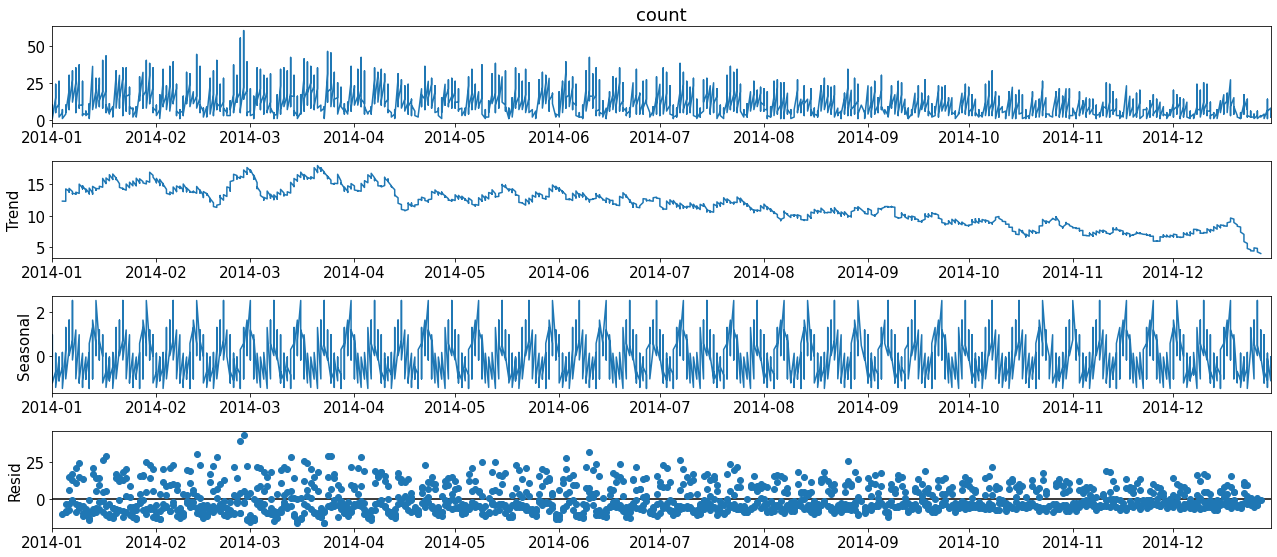

In [26]:
plt.figure()
rcParams['figure.figsize'] = 18,8
plt.rcParams.update({'font.size':15})

decomposition = seasonal_decompose(df['count']['2014-01-01':], model='additive', period = 30)
decomposition.plot()
plt.show()

## Autocorrelation

Test statistic: -6.840907764290054
p-value: 1.7923114708887027e-09
Critial Values (1%): -3.431260
Critial Values (5%): -2.861942
Critial Values (10%): -2.566984


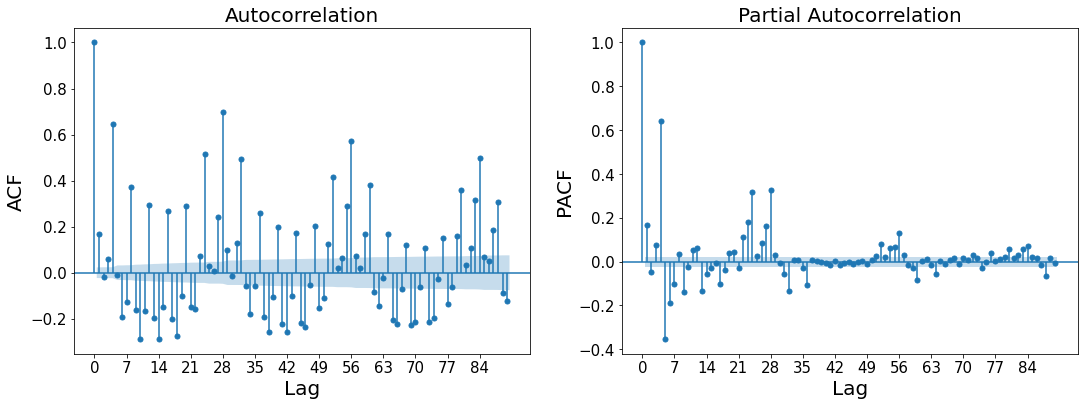

In [15]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
nlags = 90

# plot ACF
plot_acf(df['count'], lags=nlags,  ax=ax1)
ax1.set_xlabel('Lag', fontsize=20)
ax1.set_ylabel('ACF', fontsize=20)
ax1.set_xticks(np.arange(0,nlags, 7))
ax1.set_title('Autocorrelation', fontsize=20)

# plot PACF
plot_pacf(df['count'], lags=nlags, ax=ax2)
ax2.set_xlabel('Lag', fontsize=20)
ax2.set_ylabel('PACF', fontsize=20)
ax2.set_xticks(np.arange(0,nlags, 7))
ax2.set_title('Partial Autocorrelation', fontsize=20)

# perform Dickey-Fuller test
adf_results = adfuller(ts.values)
print('Test statistic:', adf_results[0])
print('p-value:', adf_results[1])
for key, value in adf_results[4].items():
    print('Critial Values (%s): %0.6f' % (key, value))